here i am taking the no of blocks used and i am taking measurements of each of them

In [ ]:
import string

def assign_blocks(n):
    alphabet = string.ascii_lowercase  # 'a' to 'z'
    blocks = {}

    for i in range(n):
        length = float(input(f"Enter length of block {alphabet[i]}: "))
        width = float(input(f"Enter width of block {alphabet[i]}: "))
        blocks[alphabet[i]] = (length, width)

    return blocks

# Example usage
count = int(input("Enter the number of blocks: "))
blocks = assign_blocks(count)

# Display stored blocks
print("\nStored Blocks:")
for name, dimensions in blocks.items():
    print(f"Block {name}: Length = {dimensions[0]}, Width = {dimensions[1]}")


Enter the number of blocks: 7
Enter length of block a: 7
Enter width of block a: 4
Enter length of block b: 1
Enter width of block b: 7
Enter length of block c: 6
Enter width of block c: 5
Enter length of block d: 5
Enter width of block d: 6
Enter length of block e: 2
Enter width of block e: 5
Enter length of block f: 6
Enter width of block f: 3
Enter length of block g: 3
Enter width of block g: 6

Stored Blocks:
Block a: Length = 7.0, Width = 4.0
Block b: Length = 1.0, Width = 7.0
Block c: Length = 6.0, Width = 5.0
Block d: Length = 5.0, Width = 6.0
Block e: Length = 2.0, Width = 5.0
Block f: Length = 6.0, Width = 3.0
Block g: Length = 3.0, Width = 6.0


In [ ]:
blocks

{'a': (4.0, 7.0),
 'b': (7.0, 1.0),
 'c': (5.0, 6.0),
 'd': (6.0, 5.0),
 'e': (5.0, 2.0),
 'f': (3.0, 6.0),
 'g': (6.0, 3.0)}

In [ ]:
input_node = "ab-cd-|ef|g-|"
input_node

'ab-cd-|ef|g-|'

In [ ]:
input_node

'ab-cd-|ef|g-|'

In [ ]:
block_count = 0
variable_count = 0

for i in input_node:
    if 'a' <= i <= 'z':
        block_count += 1
    else:
        variable_count += 1

print("Block count:", block_count)
print("Variable count:", variable_count)


Block count: 7
Variable count: 6


In [ ]:
def combine_blocks(expression):
    stack = []

    for char in expression:
        if char.isalpha():
            stack.append(char)
        elif char in "-|":  # If it's an operator, combine the last two blocks
            if len(stack) < 2:
                stack.append("#")
                break
            block2 = stack.pop()
            block1 = stack.pop()
            stack.append('*')  # Replace combined block with '*'

    return ''.join(stack)



result = combine_blocks(input_node)
print("Result after first pass:", result)

if block_count -1 == variable_count and result == "*":
  print("Valid Expression")
else:
  print("Invalid Expression")



Result after first pass: *
Valid Expression


In [ ]:
def check(in_node):
  block_count = 0
  variable_count = 0

  for i in in_node:
    if 'a' <= i <= 'z':
         block_count += 1
    else:
         variable_count += 1

  stack = []
  for char in in_node:
        if char.isalpha():
            stack.append(char)
        elif char in "-|":  # If it's an operator, combine the last two blocks
            if len(stack) < 2:
                stack.append("#")
                break
            block2 = stack.pop()
            block1 = stack.pop()
            stack.append('*')  # Replace combined block with '*'
  if block_count -1 == variable_count and result == "*":
    return True
  else:
    return False

check(input_node)

True

Now we need to calculate the total area used by the entire expression now how to do that one. now say if we used the variables then it would be difficult then use the same thing like the stack.now we should use the stack like universal is tha possible or not just we need to check it ??? hjow to calculat eht enotre space required by the block>>>>>


now we are doing in the same way as the check is done. like now we are pushing all the lists from thr top and then when we encouner an operation then we will be taking top two lists and then we will sum according to the operation nthen we will be pushing that one.

In [ ]:
blocks

In [ ]:
type(blocks['a'])

tuple

In [ ]:
input_node = "cf-d|b|ae|g|-"

now we got it .

In [ ]:
def area(in_node, blocks):
  area_stack = []
  for i in in_node:
    if 'a' <= i <= 'z':
      print(blocks[i])
      area_stack.append(blocks[i])
    else:
      l2 = area_stack.pop()
      # area_stack.pop()
      l1 = area_stack.pop()
      # area_stack.pop()
      if i == '|':
        lnew = (l1[0] + l2[0] , max(l1[1] , l2[1]))
        area_stack.append(lnew)
      elif i == '-':
        lnew = (max(l1[0], l2[0]) , l1[1] + l2[1])
        area_stack.append(lnew)
  final_area = area_stack.pop()
  # area_stack.pop()
  print(final_area[0])
  print(final_area[1])
  print(final_area[0]*final_area[1])

area(input_node, blocks)




(6.0, 5.0)
(6.0, 3.0)
(5.0, 6.0)
(1.0, 7.0)
(7.0, 4.0)
(2.0, 5.0)
(3.0, 6.0)
12.0
14.0
168.0


In [ ]:
input_node


In [ ]:
blocks

Final dimensions: 21.0 x 11.0


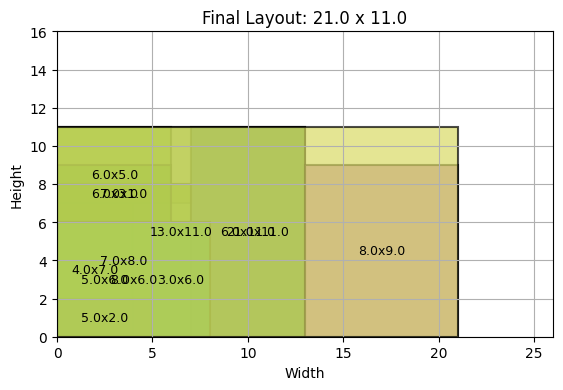

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random

class Block:
    def __init__(self, width, height, x=0, y=0):
        self.width = width
        self.height = height
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Block(w={self.width}, h={self.height}, x={self.x}, y={self.y})"

# Adjusted merge functions
def merge_vertical(b1, b2):
    w = max(b1.width, b2.width)
    h = b1.height + b2.height
    b1.x = 0
    b2.x = 0
    b2.y = b1.height
    return Block(w, h), [b1, b2]

def merge_horizontal(b1, b2):
    w = b1.width + b2.width
    h = max(b1.height, b2.height)
    b1.y = 0
    b2.y = 0
    b2.x = b1.width
    return Block(w, h), [b1, b2]

def evaluate_expression(expr):
    stack = []
    positions = []
    for token in expr:
        if isinstance(token, tuple): # block dimensions (width,height)
            stack.append(Block(*token))
        elif token in '-|':
            if len(stack) < 2:
                raise ValueError("Invalid expression")
            b2 = stack.pop()
            b1 = stack.pop()
            if token == '-': # Vertical merge
                merged_block, children = merge_vertical(b1, b2)
            else: # Horizontal merge ('|')
                merged_block, children = merge_horizontal(b1, b2)
            positions.extend(children)
            stack.append(merged_block)
        else:
            raise ValueError("Unknown token in expression")
    final_block = stack.pop()
    positions.append(final_block)
    return final_block, positions

def generate_color_palette(num_colors):
    """Generate a list of unique random colors."""
    return [[random.random() for _ in range(3)] for _ in range(num_colors)]

def visualize(blocks):
    fig, ax = plt.subplots()

    # Generate a unique color for each block
    colors = generate_color_palette(len(blocks))

    for idx, block in enumerate(blocks):
        color = colors[idx]  # Assign a unique color to each block
        rect = Rectangle((block.x, block.y), block.width, block.height,
                         linewidth=1.5, edgecolor='black', facecolor=color, alpha=0.7)
        ax.add_patch(rect)
        cx = block.x + block.width / 2
        cy = block.y + block.height / 2
        ax.text(cx, cy, f"{block.width}x{block.height}", ha='center', va='center', fontsize=9)

    total_w = max(block.x + block.width for block in blocks)
    total_h = max(block.y + block.height for block in blocks)

    ax.set_xlim(0, total_w + 5)
    ax.set_ylim(0, total_h + 5)
    ax.set_aspect('equal')
    plt.title(f"Final Layout: {total_w} x {total_h}")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.grid(True)
    plt.show()

def generate_expr(input_node, blocks):

    expr = []

    for token in input_node:
        if token.isalpha():  # If token is a block name
            if token not in blocks:
                raise ValueError(f"Block '{token}' not found in blocks.")
            expr.append(blocks[token])  # Append block dimensions as a tuple
        elif token in '-|':  # If token is a merge operator
            expr.append(token)  # Append merge operator directly
        else:
            raise ValueError(f"Unknown token '{token}' in input_node.")

    return expr

expr = generate_expr(input_node, blocks)

final_block, blocks_positions = evaluate_expression(expr)

print(f"Final dimensions: {final_block.width} x {final_block.height}")

visualize(blocks_positions)


now we are visualizing some thing atleast. now what we need to is to make a list of all the possibilities.

In [ ]:
hashmap = {}


hashmap[input_node] = True

while()

In [ ]:
import hashlib
from collections import deque

def hash_expression(expression):
    """Generate a hash for a given expression to avoid duplicate processing."""
    return hashlib.md5(expression.encode()).hexdigest()

def combine_blocks(expression):
    stack = []
    for char in expression:
        if char.isalpha():
            stack.append(char)
        elif char in "-|":
            if len(stack) < 2:
                return False
            block2 = stack.pop()
            block1 = stack.pop()
            stack.append('*')
    return len(stack) == 1 and stack[0] == '*'

def area(input_node, blocks):
    """Calculate the area used by a given configuration."""
    area_stack = []
    for i in input_node:
        if 'a' <= i <= 'z':
            area_stack.append(blocks[i])
        else:
            l2 = area_stack.pop()
            l1 = area_stack.pop()
            if i == '|':
                lnew = (l1[0] + l2[0], max(l1[1], l2[1]))
                area_stack.append(lnew)
            elif i == '-':
                lnew = (max(l1[0], l2[0]), l1[1] + l2[1])
                area_stack.append(lnew)
    final_area = area_stack.pop()
    return final_area[0] * final_area[1]

def swap_variables(expression, i, j):

    expr_list = list(expression)
    expr_list[i], expr_list[j] = expr_list[j], expr_list[i]
    return ''.join(expr_list)

def swap_operators(expression, i, j):

    expr_list = list(expression)
    expr_list[i], expr_list[j] = expr_list[j], expr_list[i]
    return ''.join(expr_list)

def swap_variable_operator(expression, var_idx, op_idx):

    expr_list = list(expression)
    expr_list[var_idx], expr_list[op_idx] = expr_list[op_idx], expr_list[var_idx]
    return ''.join(expr_list)

def optimize_expression(input_node, blocks):


    # Calculate total block area
    total_block_area = sum(w * h for w, h in blocks.values())
    limit_area = 1.05 * total_block_area
    print(f"Total Block Area: {total_block_area}, Limit Area: {limit_area}")

    visited_states = set()
    visited_states.add(hash_expression(input_node))

    queue = deque([(input_node, 0)])  # Queue stores (expression, depth)

    state_ordering = []  # Store all intermediate states and areas
    state_ordering.append((input_node, area(input_node, blocks)))  # Add original state

    while queue:
        current_expr, current_depth = queue.popleft()
        current_area = area(current_expr, blocks)

        # Stop if current area exceeds limit
        if current_area <= limit_area:
            print("\nStopping condition met!")
            print(f"Expression: {current_expr}, Area: {current_area}")
            state_ordering.append((current_expr, current_area))
            break

        # Generate all possible swaps
        children_states = []
        for i in range(len(current_expr)):
            for j in range(i + 1, len(current_expr)):
                # Swap two variables
                if current_expr[i].isalpha() and current_expr[j].isalpha():
                    new_expr = swap_variables(current_expr, i, j)
                    if new_expr not in visited_states and combine_blocks(new_expr):
                        new_area = area(new_expr, blocks)
                        visited_states.add(hash_expression(new_expr))
                        children_states.append((new_expr, new_area))

                # Swap two operators
                if current_expr[i] in "-|" and current_expr[j] in "-|":
                    new_expr = swap_operators(current_expr, i, j)
                    if new_expr not in visited_states and combine_blocks(new_expr):
                        new_area = area(new_expr, blocks)
                        visited_states.add(hash_expression(new_expr))
                        children_states.append((new_expr, new_area))

                # Swap variable and operator
                if current_expr[i].isalpha() and current_expr[j] in "-|":
                    new_expr = swap_variable_operator(current_expr, i, j)
                    if new_expr not in visited_states and combine_blocks(new_expr):
                        new_area = area(new_expr, blocks)
                        visited_states.add(hash_expression(new_expr))
                        children_states.append((new_expr, new_area))

        # Sort children by area and pick top 5
        children_states.sort(key=lambda x: x[1])
        top_children = children_states[:5]

        # Add top children to queue
        for child_expr, child_area in top_children:
            queue.append((child_expr, current_depth + 1))
            state_ordering.append((child_expr, child_area))

    # Print all intermediate states and final state
    print("\nState Ordering:")

    for idx, (expr, area_used) in enumerate(state_ordering):
        # print(f"Step {idx + 1}: Expression: {expr}, Area: {area_used}")
        output_queue1.append((expr, area_used))

# Example usage
output_queue1 =[]
output_queue2 = []
optimize_expression(input_node, blocks)
min_area_obtained =100000
for (i , j) in output_queue1:
  min_area_obtained = min(min_area_obtained,j)
for (i , j) in output_queue1:
  if j > min_area_obtained:
    print(f"{i} for area = {j}")
    output_queue2.append((i,j))
  else :
    print(f"{i} for area = {j}")
    output_queue2.append((i,j))
    break



Total Block Area: 141.0, Limit Area: 148.05


KeyboardInterrupt: 

In [ ]:
output_queue2

[('ab-cd-|ef|g-|', 231.0),
 ('ab-ed-|cf|g-|', 189.0),
 ('ab-ce-|df|g-|', 189.0),
 ('eb-cd-|af|g-|', 220.0),
 ('ag-cd-|ef|b-|', 220.0),
 ('ba-cd-|ef|g-|', 231.0),
 ('ab-gd-|cf|e-|', 168.0),
 ('db-ea-|cf|g-|', 180.0),
 ('ae-bd-|cf|g-|', 180.0),
 ('ba-ed-|cf|g-|', 189.0),
 ('ab-ed-|cf|g-|', 189.0),
 ('ba-ce-|df|g-|', 189.0),
 ('cb-ae-|df|g-|', 189.0),
 ('ae-cb-|df|g-|', 189.0),
 ('ab-ce-|df|g-|', 189.0),
 ('ab-ce-|df|g-|', 189.0),
 ('eb-cd|-af|g-|', 180.0),
 ('db-ce-|af|g-|', 190.0),
 ('ec-bd-|af|g-|', 190.0),
 ('cb-ed-|af|g-|', 200.0),
 ('ed-cb-|af|g-|', 200.0),
 ('ag-ed-|cf|b-|', 200.0),
 ('ag-ce-|df|b-|', 200.0),
 ('eg-cd-|af|b-|', 209.0),
 ('ga-cd-|ef|b-|', 220.0),
 ('ae-cd-|gf|b-|', 220.0),
 ('ba-ed-|cf|g-|', 189.0),
 ('ba-ce-|df|g-|', 189.0),
 ('ga-cd-|ef|b-|', 220.0),
 ('be-cd-|af|g-|', 220.0),
 ('ab-cd-|ef|g-|', 231.0),
 ('ba-gd-|cf|e-|', 168.0),
 ('ab-gd-|cf|e-|', 168.0),
 ('ab-gd-|cf|e-|', 168.0),
 ('ab-dg-|cf|e-|', 168.0),
 ('ab-gd-|cf|e-|', 168.0),
 ('dg-ea-|cf|b-|', 171.0),
 

Expression: ab-cd-|ef|g-| for area = 231.0


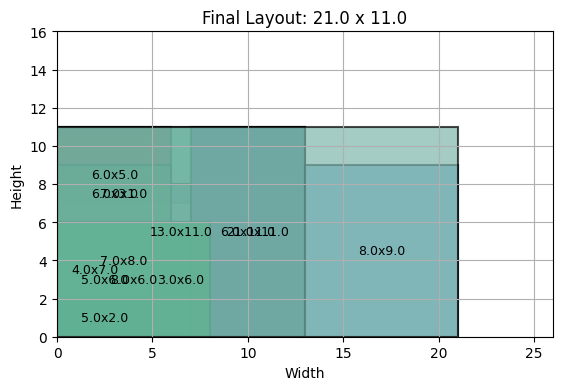

Expression: ab-ed-|cf|g-| for area = 189.0


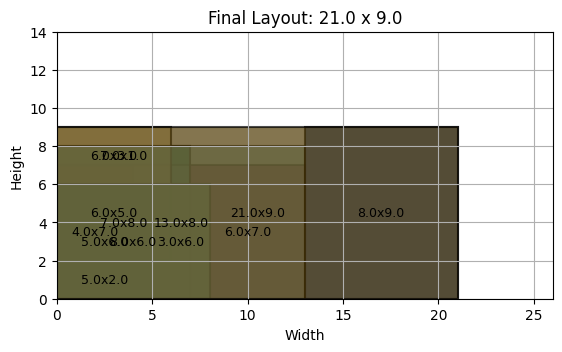

Expression: ab-ce-|df|g-| for area = 189.0


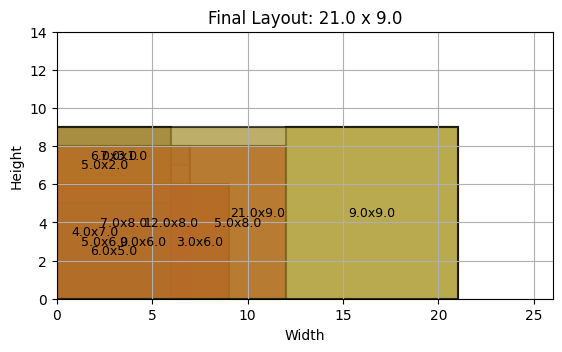

Expression: eb-cd-|af|g-| for area = 220.0


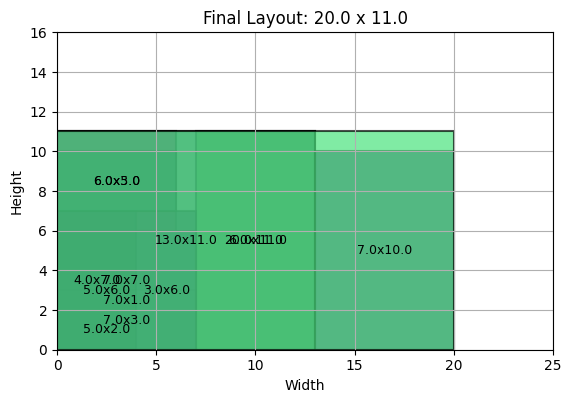

Expression: ag-cd-|ef|b-| for area = 220.0


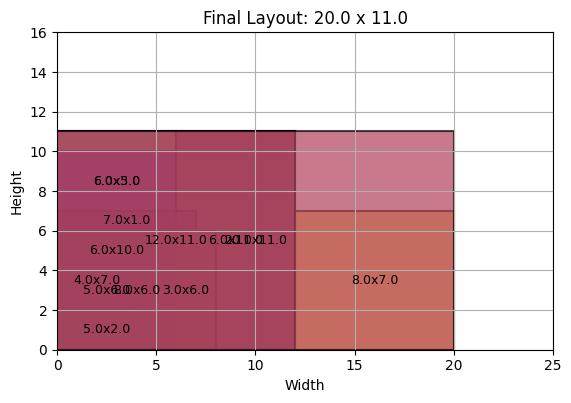

Expression: ba-cd-|ef|g-| for area = 231.0


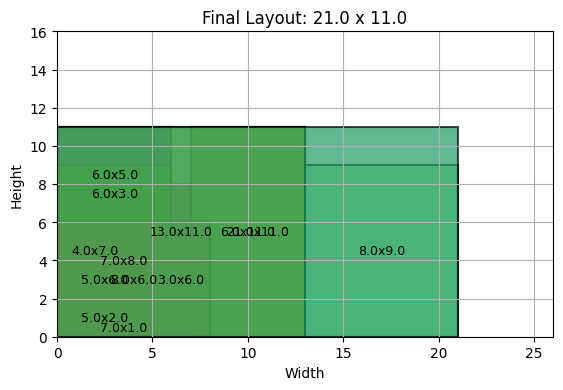

Expression: ab-gd-|cf|e-| for area = 168.0


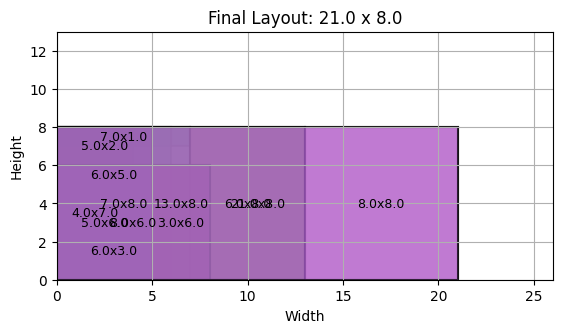

Expression: db-ea-|cf|g-| for area = 180.0


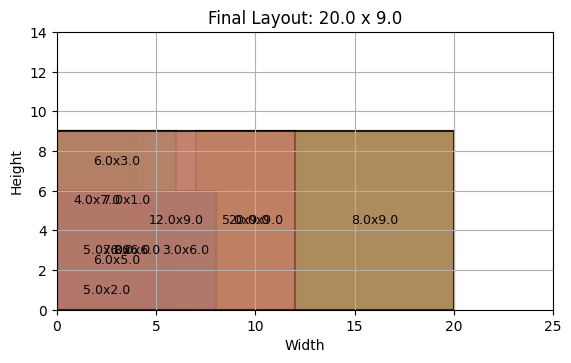

Expression: ae-bd-|cf|g-| for area = 180.0


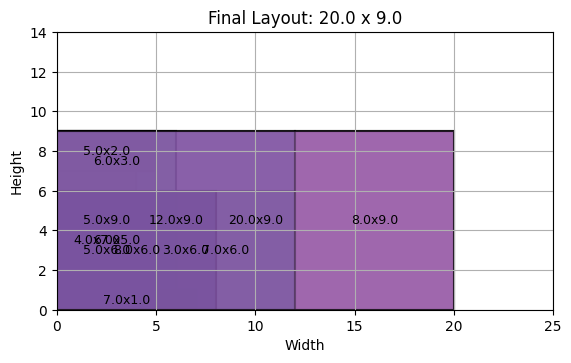

Expression: ba-ed-|cf|g-| for area = 189.0


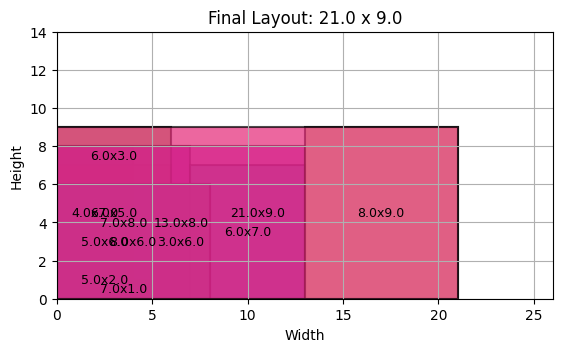

Expression: ab-ed-|cf|g-| for area = 189.0


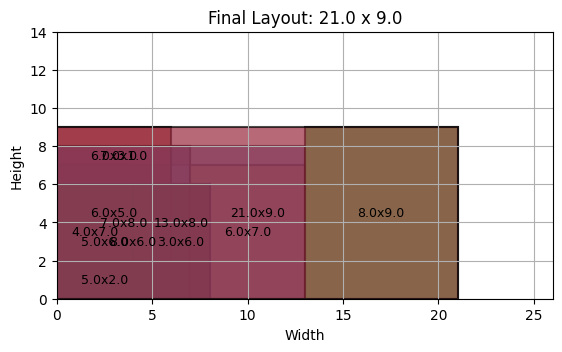

Expression: ba-ce-|df|g-| for area = 189.0


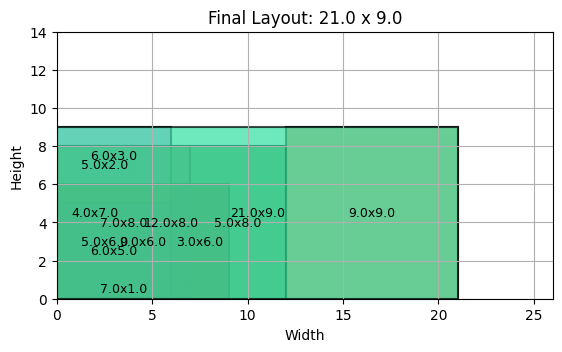

Expression: cb-ae-|df|g-| for area = 189.0


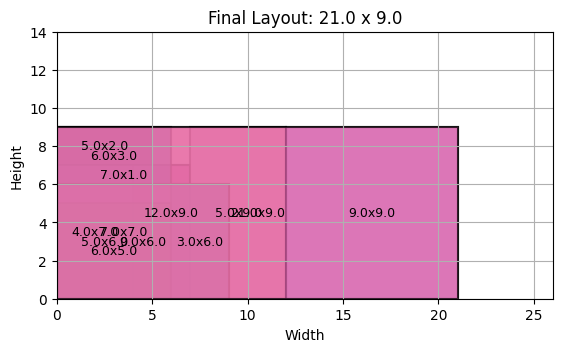

Expression: ae-cb-|df|g-| for area = 189.0


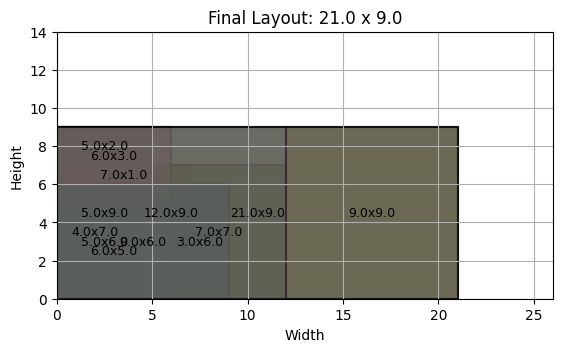

Expression: ab-ce-|df|g-| for area = 189.0


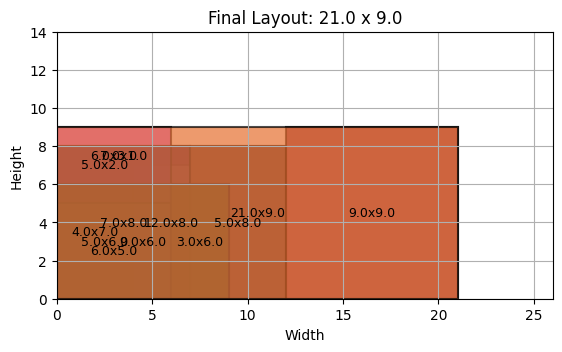

Expression: ab-ce-|df|g-| for area = 189.0


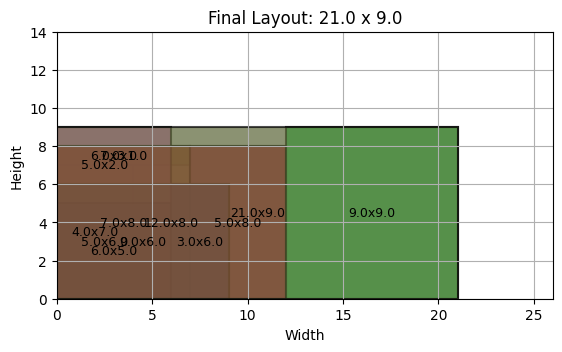

Expression: eb-cd|-af|g-| for area = 180.0


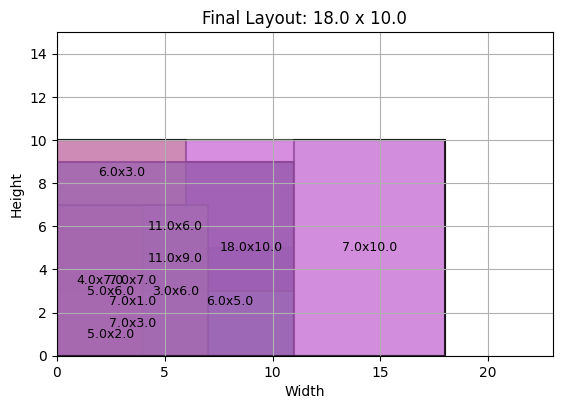

Expression: db-ce-|af|g-| for area = 190.0


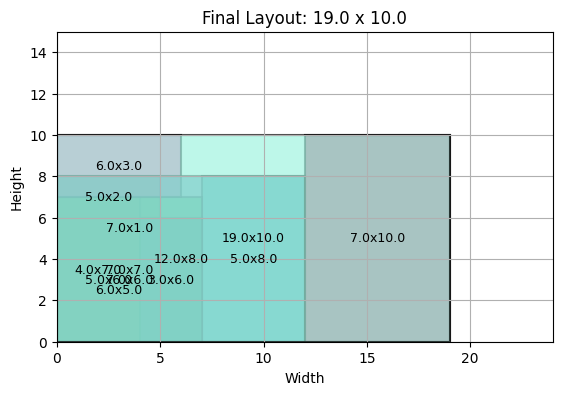

Expression: ec-bd-|af|g-| for area = 190.0


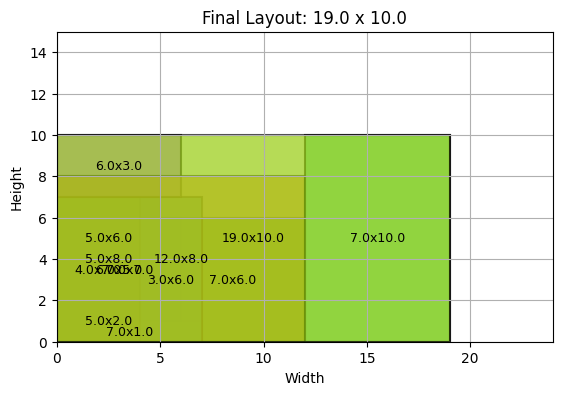

Expression: cb-ed-|af|g-| for area = 200.0


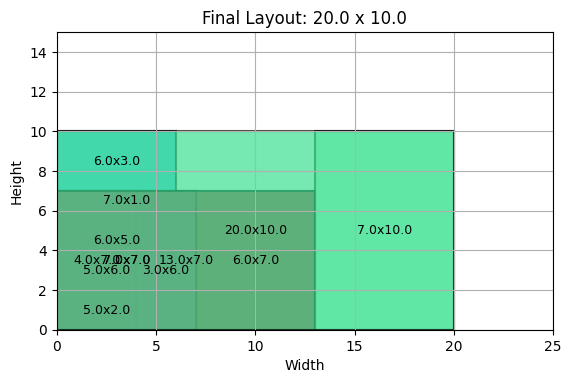

Expression: ed-cb-|af|g-| for area = 200.0


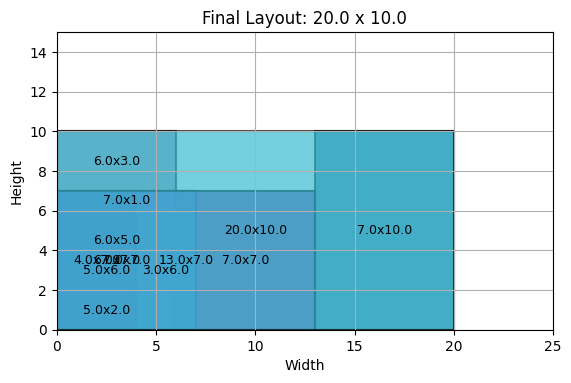

Expression: ag-ed-|cf|b-| for area = 200.0


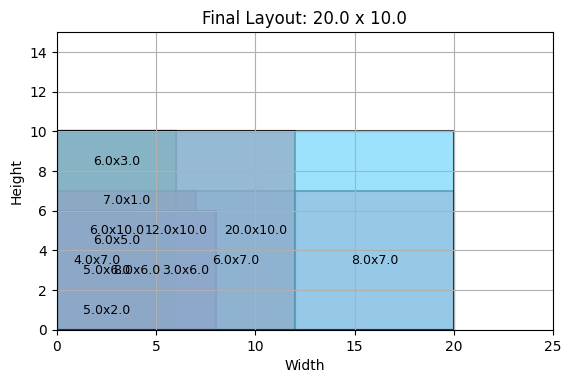

Expression: ag-ce-|df|b-| for area = 200.0


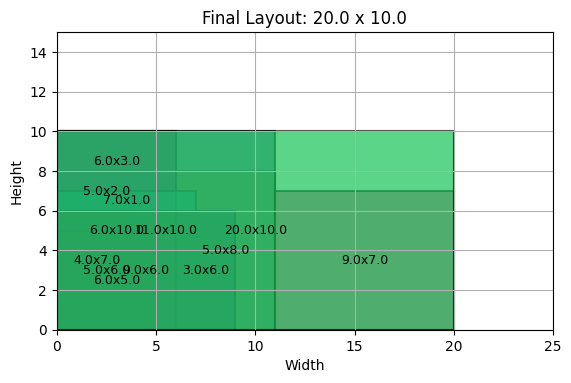

Expression: eg-cd-|af|b-| for area = 209.0


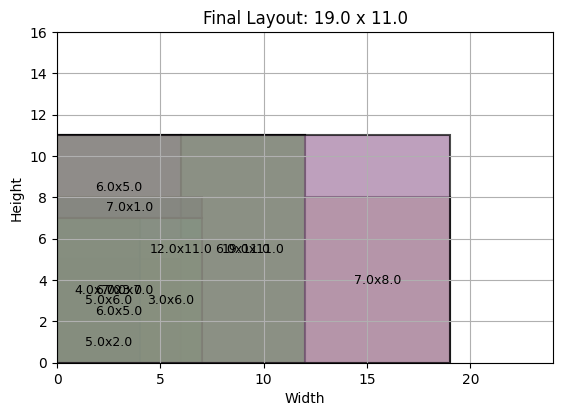

Expression: ga-cd-|ef|b-| for area = 220.0


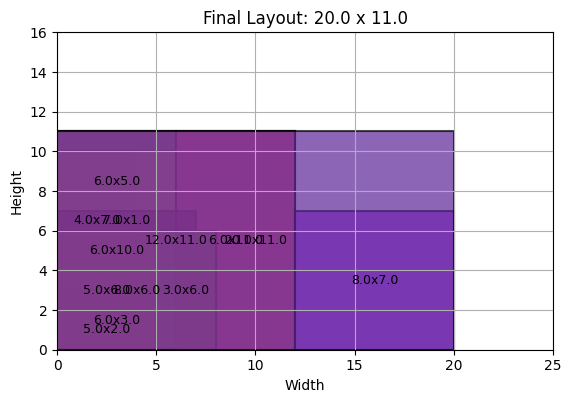

Expression: ae-cd-|gf|b-| for area = 220.0


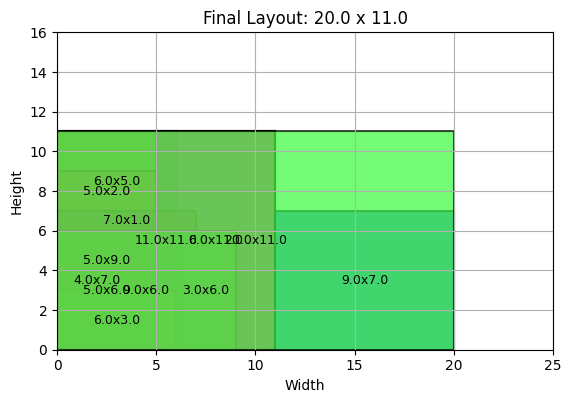

Expression: ba-ed-|cf|g-| for area = 189.0


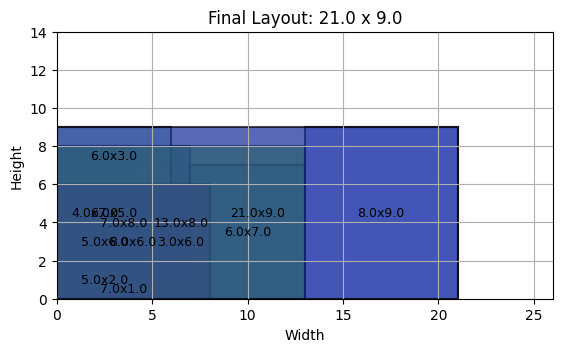

Expression: ba-ce-|df|g-| for area = 189.0


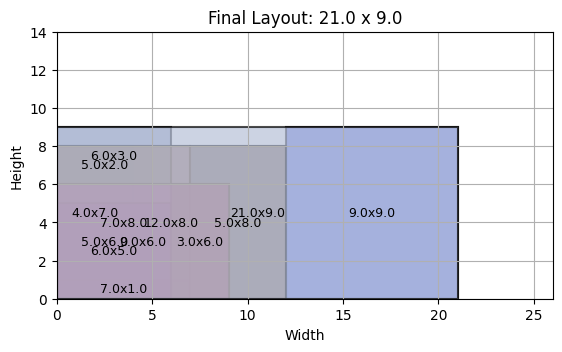

Expression: ga-cd-|ef|b-| for area = 220.0


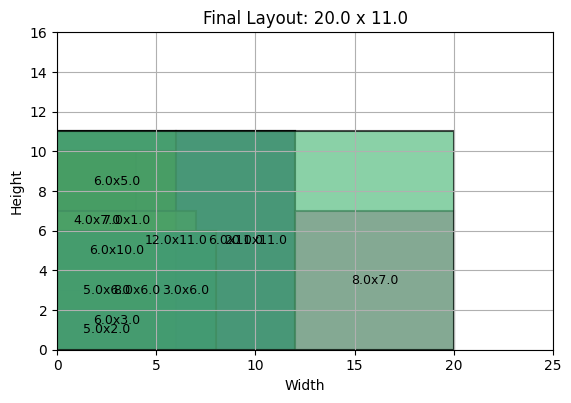

Expression: be-cd-|af|g-| for area = 220.0


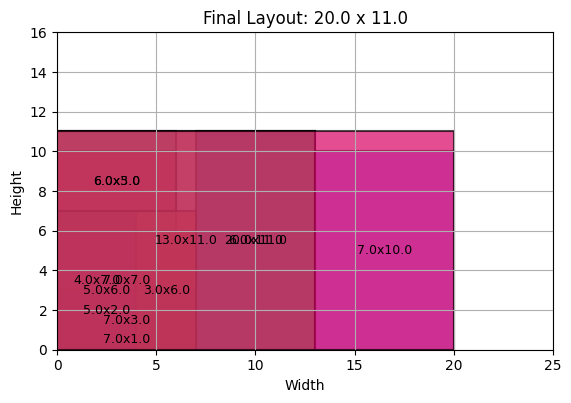

Expression: ab-cd-|ef|g-| for area = 231.0


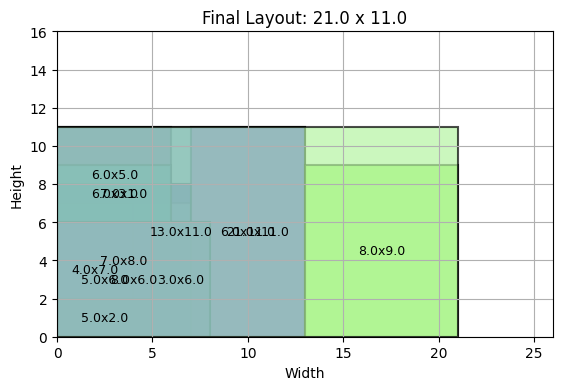

Expression: ba-gd-|cf|e-| for area = 168.0


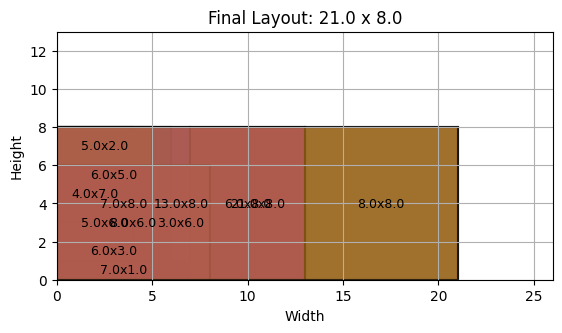

Expression: ab-gd-|cf|e-| for area = 168.0


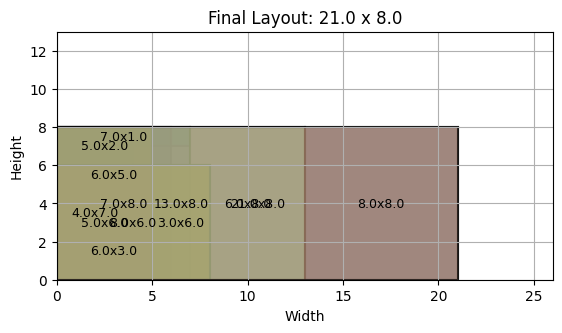

Expression: ab-gd-|cf|e-| for area = 168.0


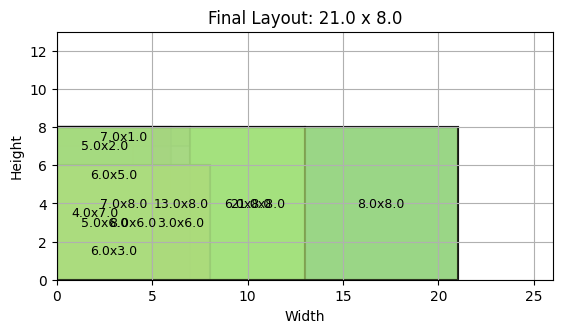

Expression: ab-dg-|cf|e-| for area = 168.0


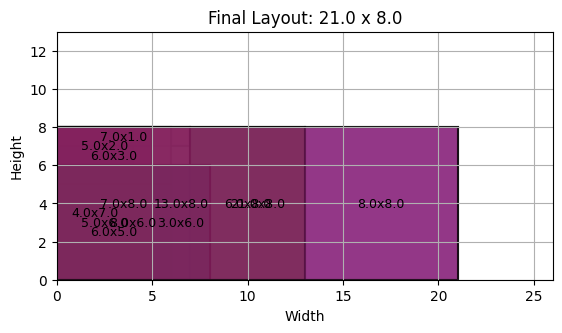

Expression: ab-gd-|cf|e-| for area = 168.0


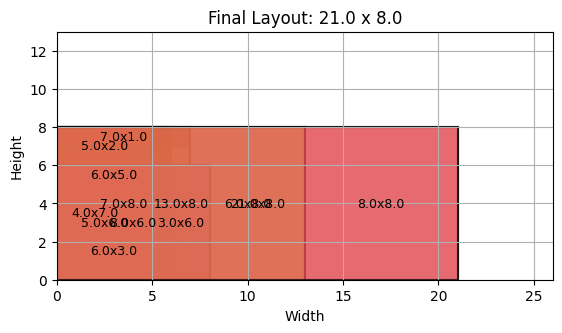

Expression: dg-ea-|cf|b-| for area = 171.0


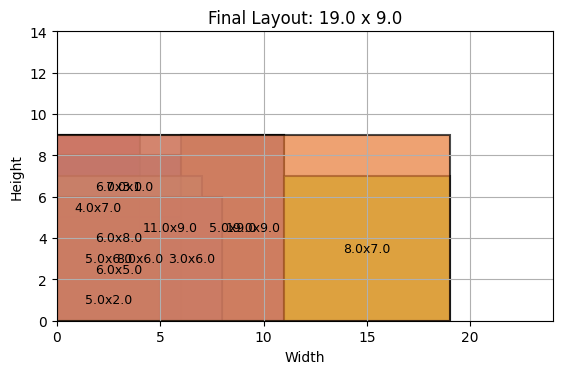

Expression: db-e-a|cf|g-| for area = 171.0


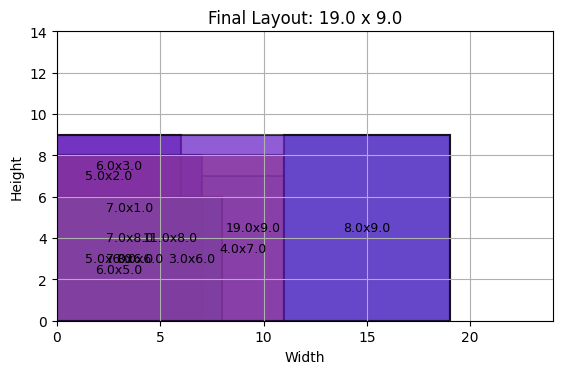

Expression: bd-ea-|cf|g-| for area = 180.0


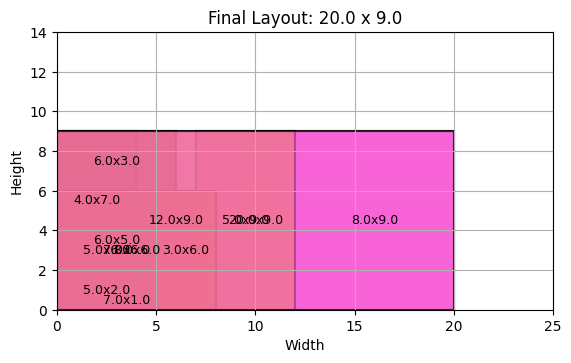

Expression: db-ea-|cf|g-| for area = 180.0


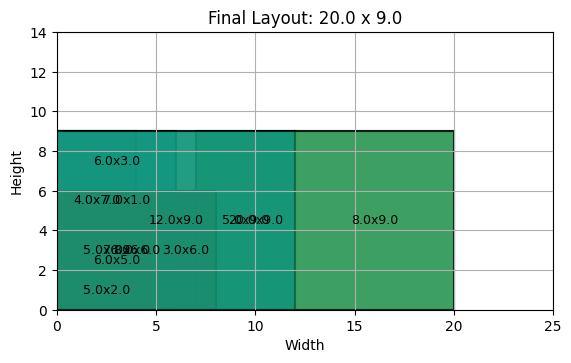

Expression: db-ea-|cf|g-| for area = 180.0


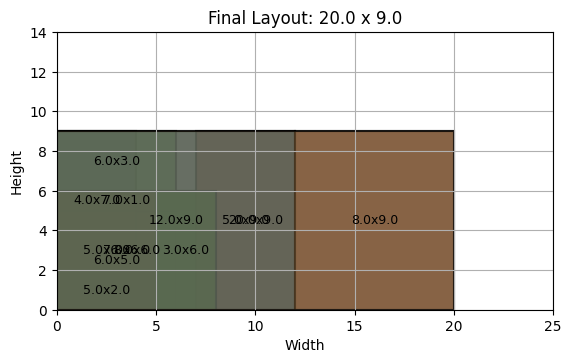

Expression: ae-gd-|cf|b-| for area = 171.0


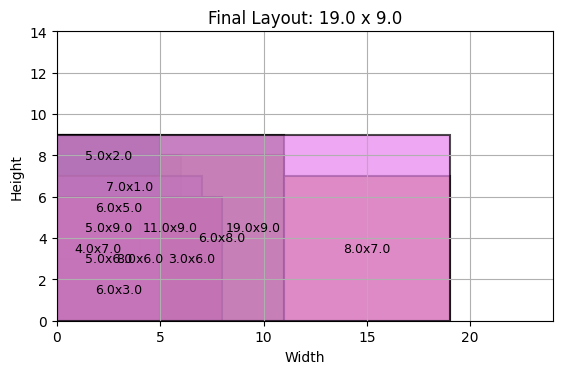

Expression: ea-bd-|cf|g-| for area = 180.0


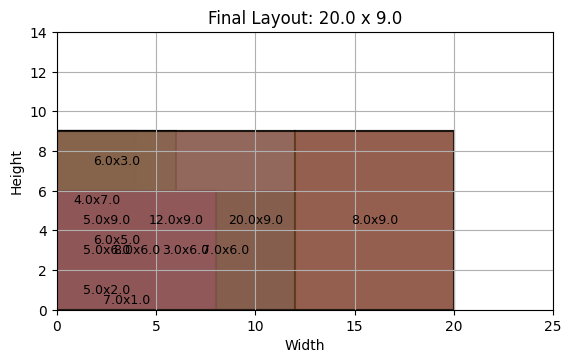

Expression: ae-bd-|cf|g-| for area = 180.0


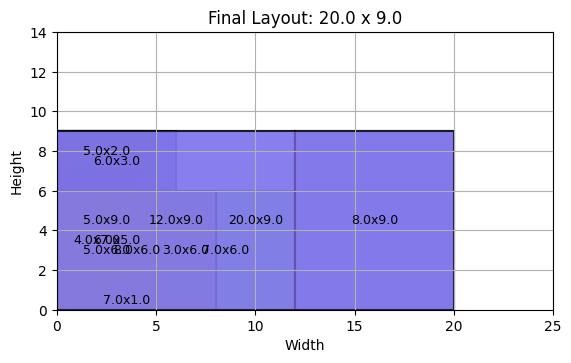

Expression: ae-bd-|cf|g-| for area = 180.0


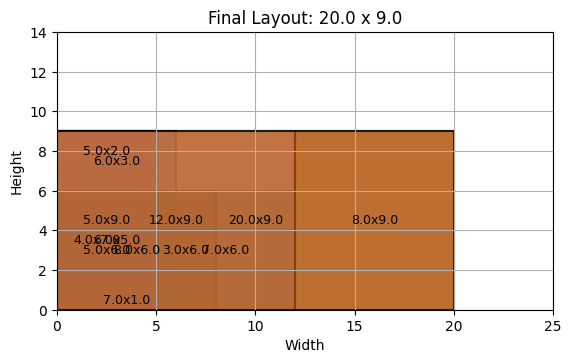

Expression: ae-db-|cf|g-| for area = 180.0


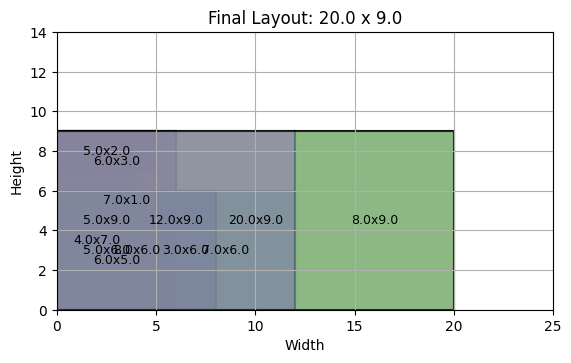

Expression: ba-gd-|cf|e-| for area = 168.0


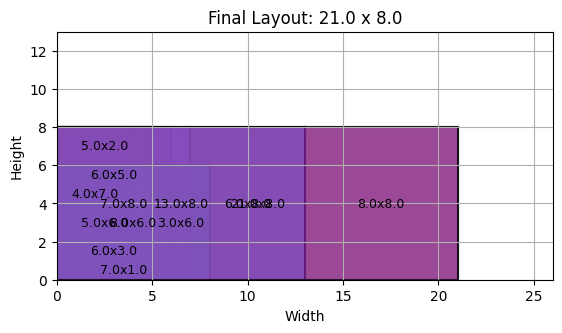

Expression: ea-bd-|cf|g-| for area = 180.0


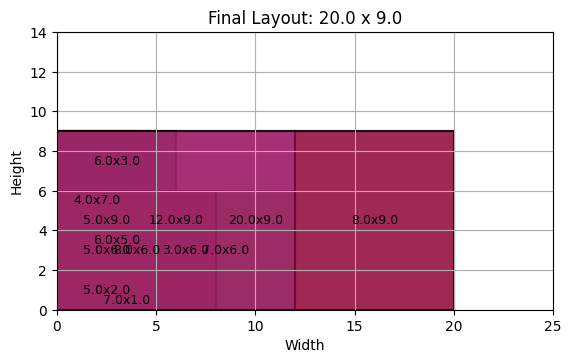

Expression: bd-ea-|cf|g-| for area = 180.0


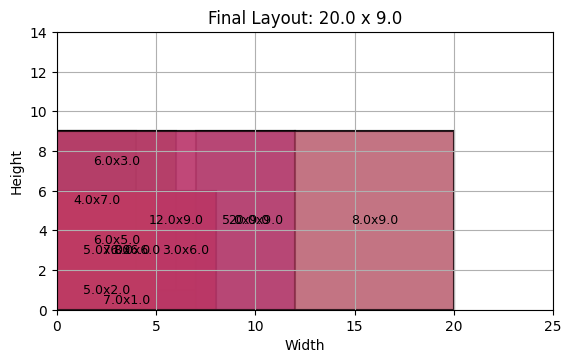

Expression: ab-ed-|cf|g-| for area = 189.0


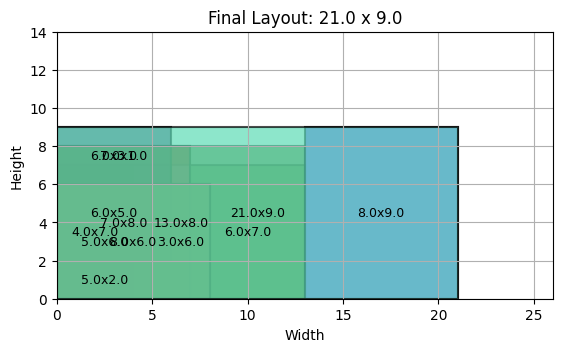

Expression: ba-ed-|cf|g-| for area = 189.0


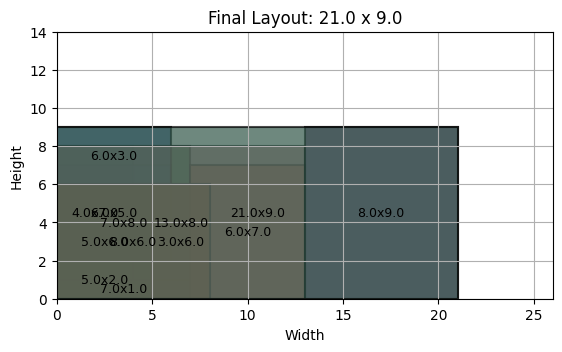

Expression: ab-gd-|cf|e-| for area = 168.0


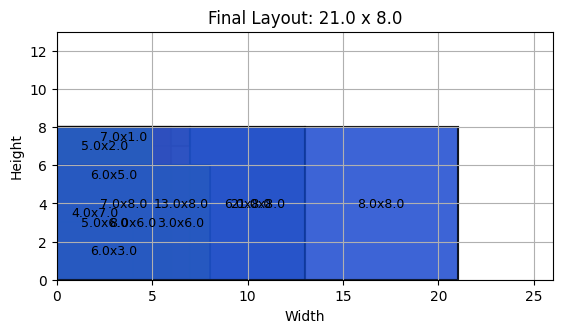

Expression: db-ea-|cf|g-| for area = 180.0


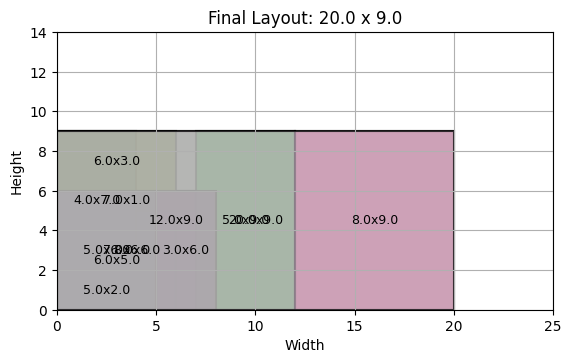

Expression: ae-bd-|cf|g-| for area = 180.0


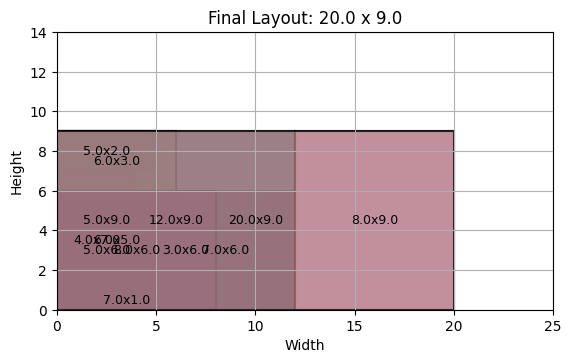

Expression: ba-ed-|cf|g-| for area = 189.0


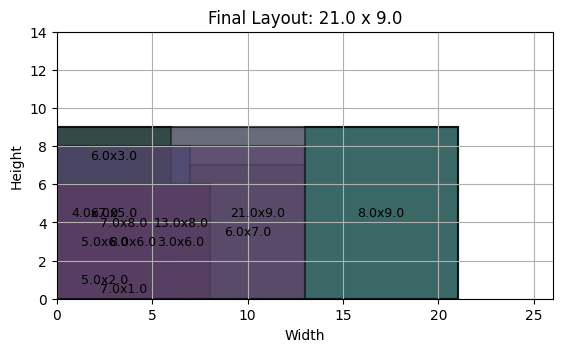

Expression: ab-ed-|cf|g-| for area = 189.0


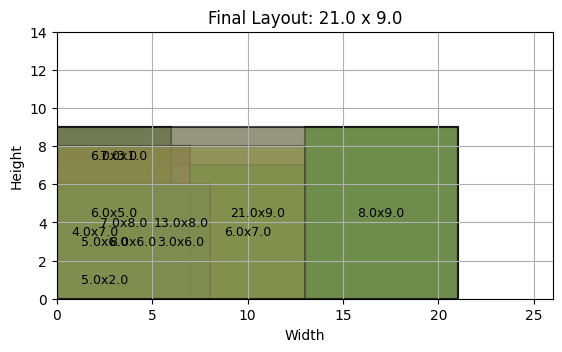

Expression: ab-ce-|df|g-| for area = 189.0


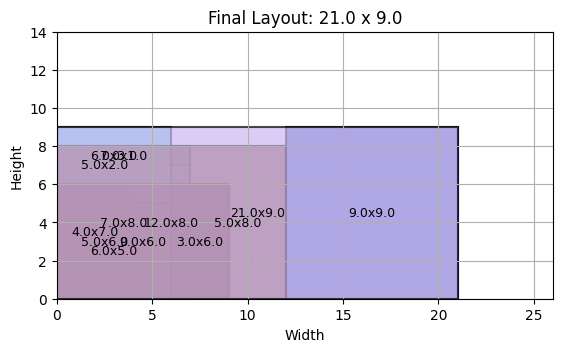

Expression: ea-cb-|df|g-| for area = 189.0


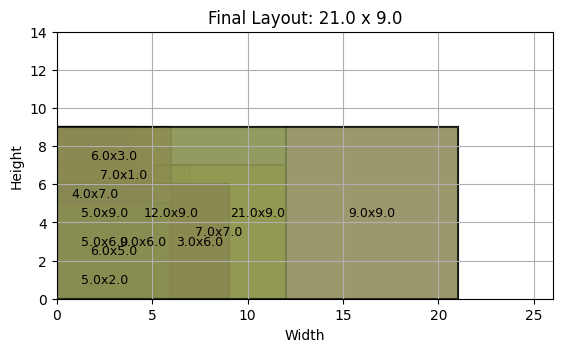

Expression: bc-ae-|df|g-| for area = 189.0


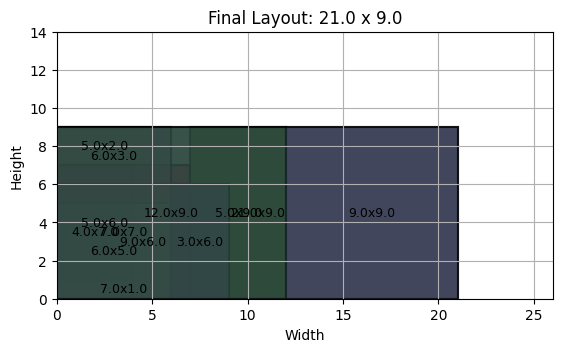

Expression: ba-ce-|df|g-| for area = 189.0


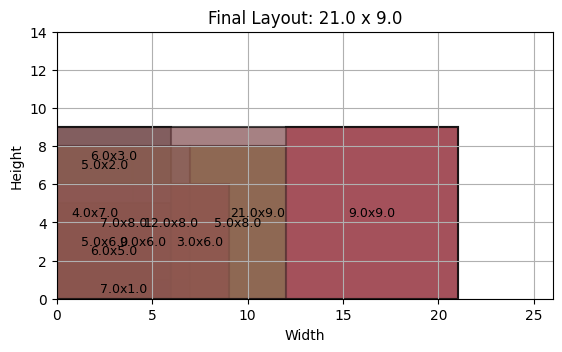

Expression: ba-ce-|df|g-| for area = 189.0


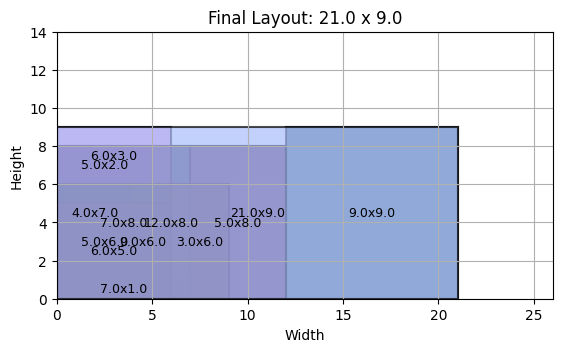

Expression: db-ae-|cf|g-| for area = 180.0


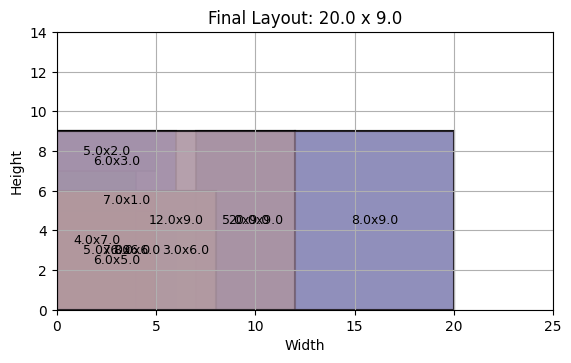

Expression: cg-ae-|df|b-| for area = 180.0


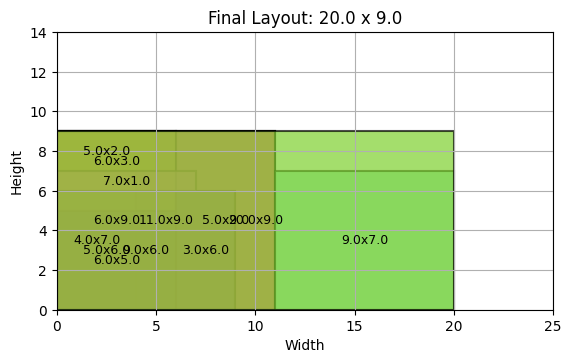

Expression: bc-ae-|df|g-| for area = 189.0


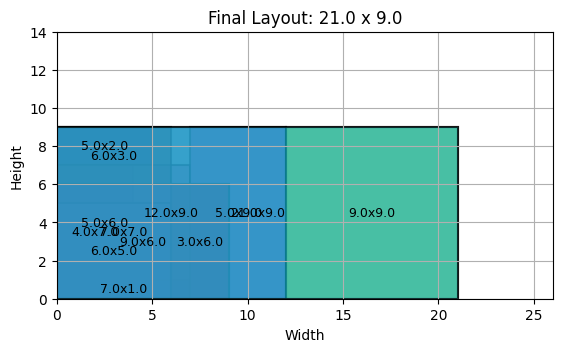

Expression: ab-ce-|df|g-| for area = 189.0


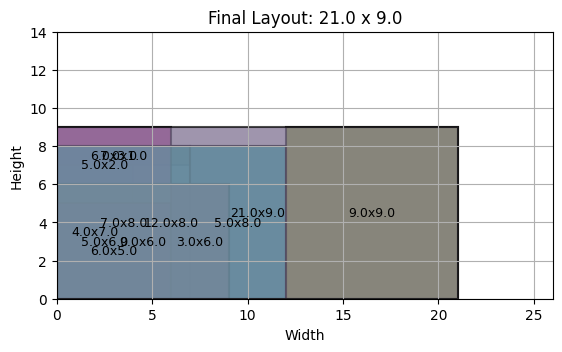

Expression: ce-ab-|df|g-| for area = 189.0


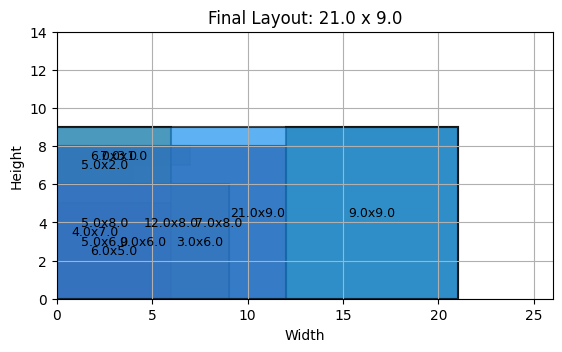

Expression: ae-db-|cf|g-| for area = 180.0


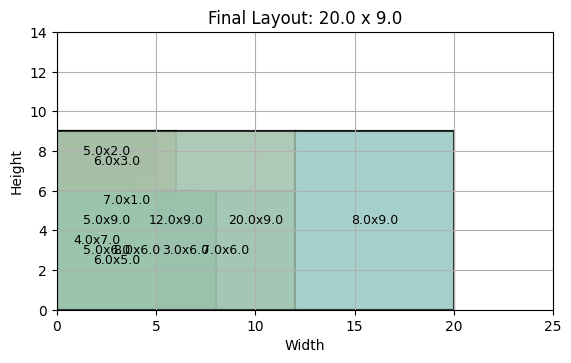

Expression: ae-cg-|df|b-| for area = 180.0


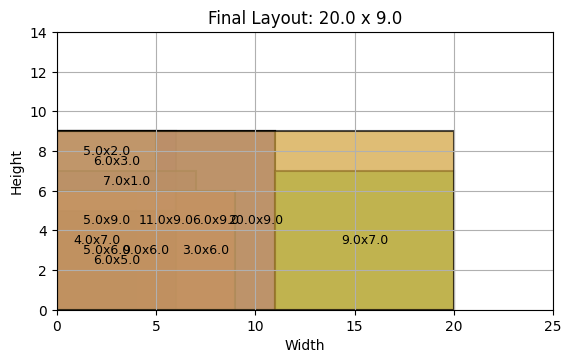

Expression: ea-cb-|df|g-| for area = 189.0


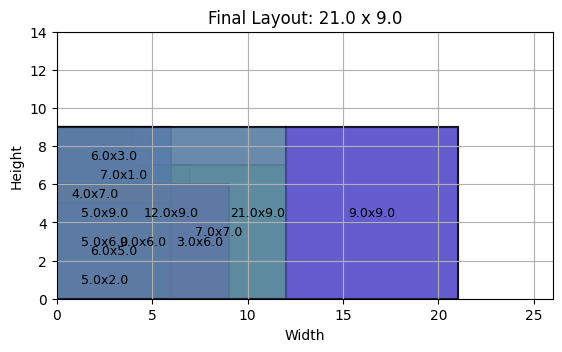

Expression: ce-ab-|df|g-| for area = 189.0


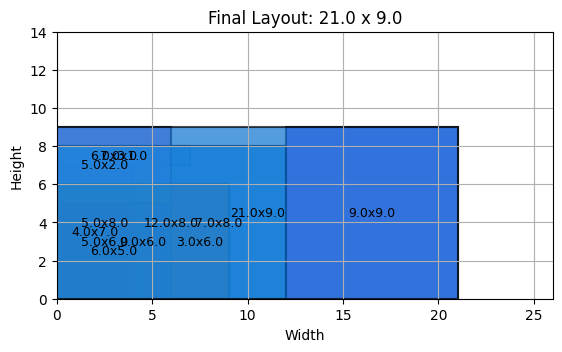

Expression: ab-ce-|df|g-| for area = 189.0


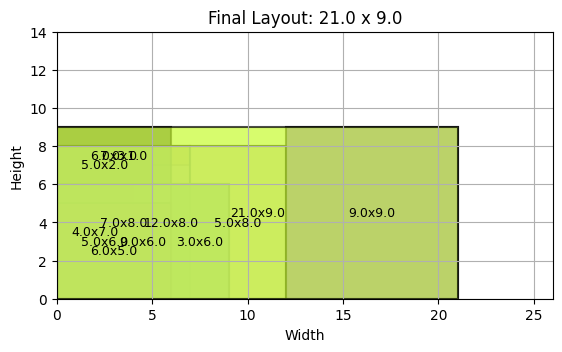

Expression: ba-ce-|df|g-| for area = 189.0


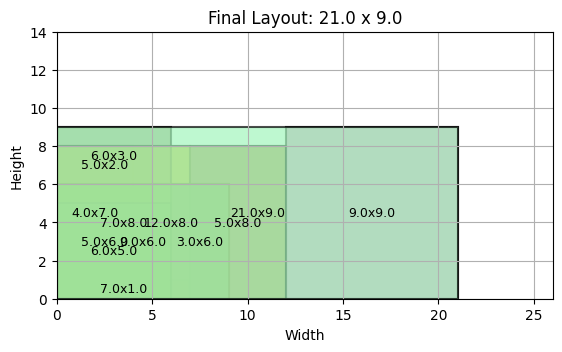

Expression: cb-ae-|df|g-| for area = 189.0


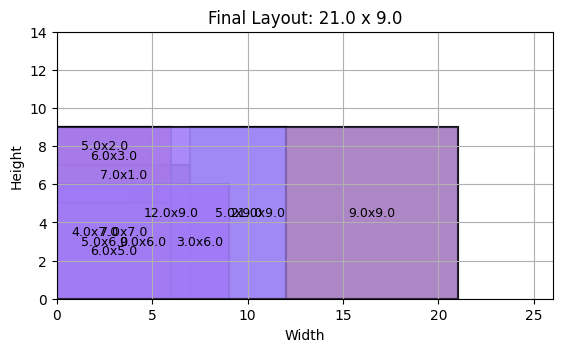

Expression: ae-cb-|df|g-| for area = 189.0


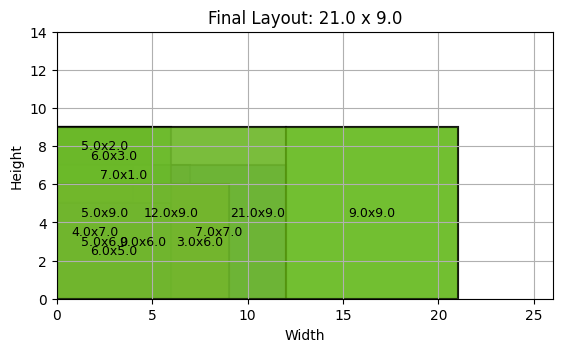

Expression: ab-ce-|df|g-| for area = 189.0


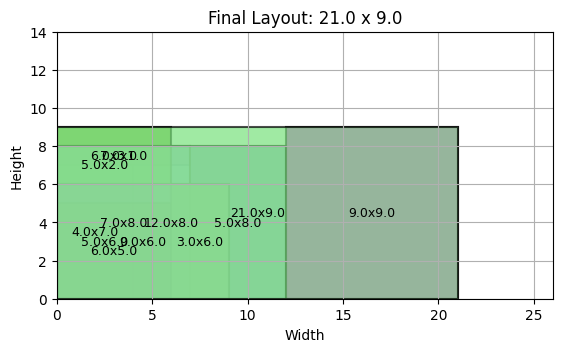

Expression: ab-ce-|df|g-| for area = 189.0


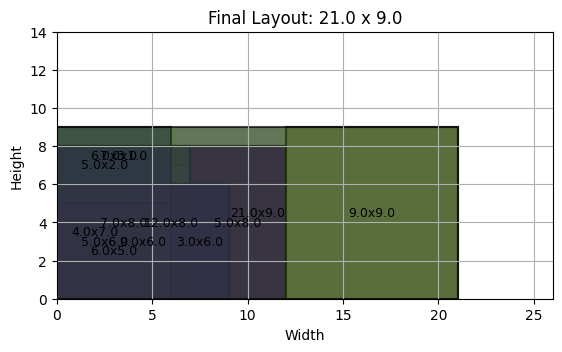

Expression: ba-ce-|df|g-| for area = 189.0


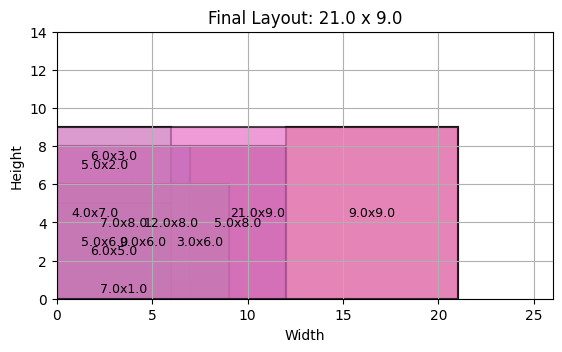

Expression: cb-ae-|df|g-| for area = 189.0


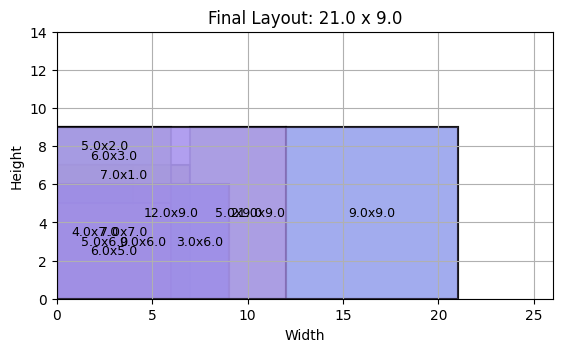

Expression: ae-cb-|df|g-| for area = 189.0


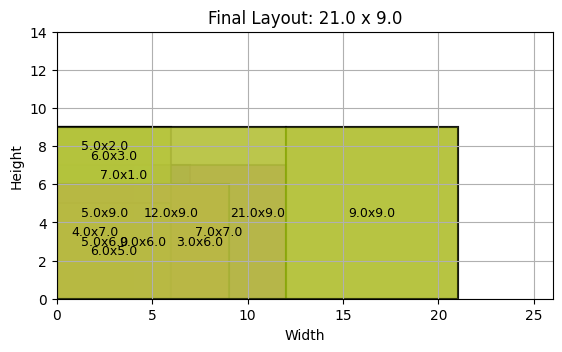

Expression: ab-ce-|df|g-| for area = 189.0


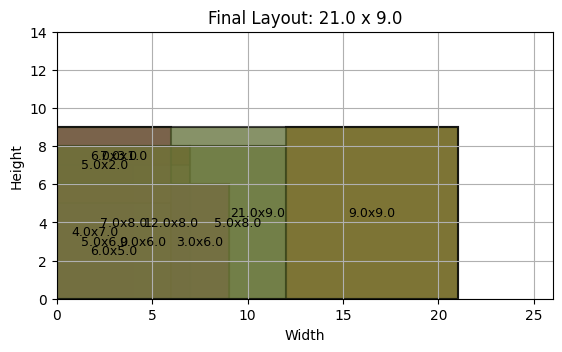

Expression: ab-ce-|df|g-| for area = 189.0


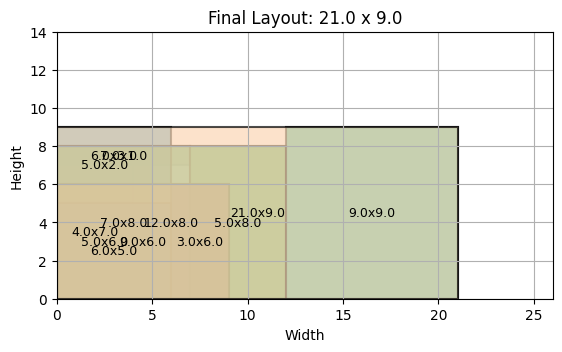

Expression: be-cd|-af|g-| for area = 180.0


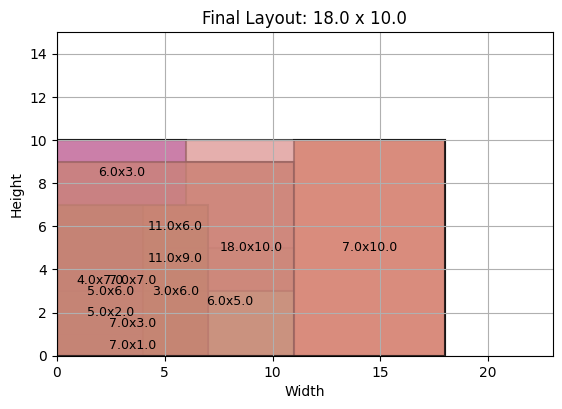

Expression: gb-cd|-af|e-| for area = 180.0


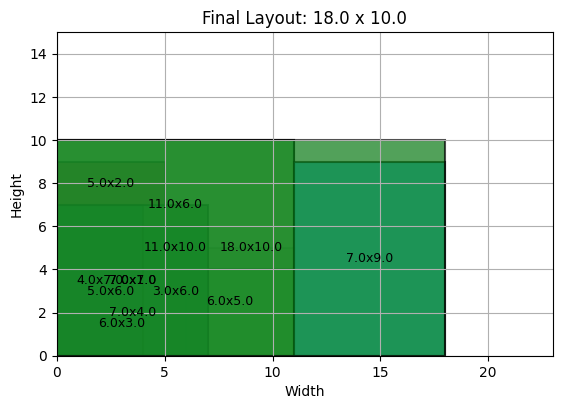

Expression: eb-cd|-af|g-| for area = 180.0


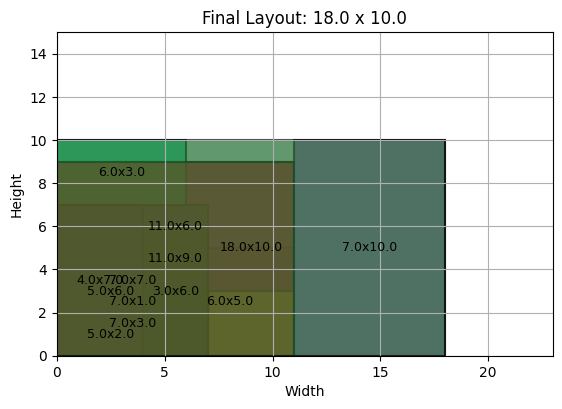

Expression: eb-cd|-af|g-| for area = 180.0


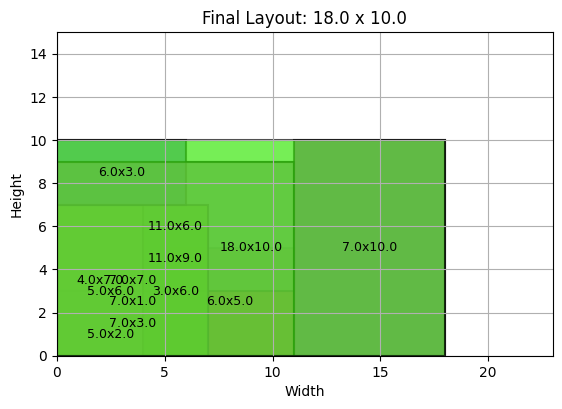

Expression: eb-dc|-af|g-| for area = 180.0


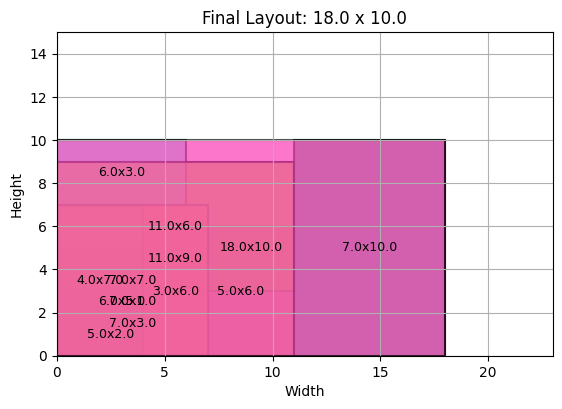

Expression: dg-ce-|af|b-| for area = 144.0


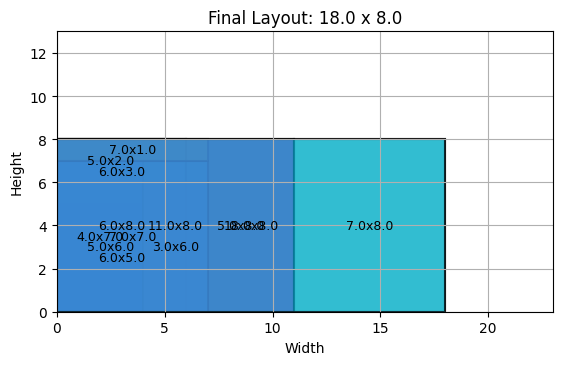

Final step reached!


In [ ]:
def visualize_sequence(output_queue, blocks):
    idx =0;
    for expression, areaa in output_queue:
        print(f"Expression: {expression} for area = {areaa}")


        # Generate expr from the current expression
        expr = generate_expr(expression, blocks)

        # Evaluate the expression to get block positions
        final_block, blocks_positions = evaluate_expression(expr)

        # Visualize the current state
        visualize(blocks_positions)
        idx = idx +1
        # Break after visualizing the final state
        if idx == len(output_queue):
            print("Final step reached!")
            break



visualize_sequence(output_queue2, blocks)


In [ ]:
import hashlib
from collections import deque
import time

class Node:
    """Represents a node in the search tree."""
    def __init__(self, expression, parent=None):
        self.expression = expression
        self.parent = parent

def hash_expression(expression):
    """Generate a hash for a given expression to avoid duplicate processing."""
    return hashlib.md5(expression.encode()).hexdigest()

def combine_blocks(expression):
    stack = []
    for char in expression:
        if char.isalpha():
            stack.append(char)
        elif char in "-|":
            if len(stack) < 2:
                return False
            block2 = stack.pop()
            block1 = stack.pop()
            stack.append('*')
    return len(stack) == 1 and stack[0] == '*'

def area(input_node, blocks):
    """Calculate the area used by a given configuration."""
    area_stack = []
    for i in input_node:
        if 'a' <= i <= 'z':
            area_stack.append(blocks[i])
        else:
            l2 = area_stack.pop()
            l1 = area_stack.pop()
            if i == '|':
                lnew = (l1[0] + l2[0], max(l1[1], l2[1]))
                area_stack.append(lnew)
            elif i == '-':
                lnew = (max(l1[0], l2[0]), l1[1] + l2[1])
                area_stack.append(lnew)
    final_area = area_stack.pop()
    return final_area[0] * final_area[1]

def swap_variables(expression, i, j):
    """Swap two variables in the expression."""
    expr_list = list(expression)
    expr_list[i], expr_list[j] = expr_list[j], expr_list[i]
    return ''.join(expr_list)

def swap_operators(expression, i, j):
    """Swap two operators in the expression."""
    expr_list = list(expression)
    expr_list[i], expr_list[j] = expr_list[j], expr_list[i]
    return ''.join(expr_list)

def swap_variable_operator(expression, var_idx, op_idx):
    """Swap a variable and an operator in the expression."""
    expr_list = list(expression)
    expr_list[var_idx], expr_list[op_idx] = expr_list[op_idx], expr_list[var_idx]
    return ''.join(expr_list)

def optimize_expression(input_node, blocks):
    """Optimize the expression to minimize area using BFS with object-based tracking."""

    # Calculate total block area
    total_block_area = sum(w * h for w, h in blocks.values())
    print(f"Total Block Area: {total_block_area}")

    visited_states = set()
    visited_states.add(hash_expression(input_node))

    root_node = Node(input_node)  # Create root node
    queue = deque([root_node])  # Queue stores nodes

    min_area = float('inf')
    min_node = None

    start_time = time.time()  # Start timer

    while queue:
        current_node = queue.popleft()
        current_expr = current_node.expression
        current_area = area(current_expr, blocks)

        # Check if this is the minimum area encountered so far
        if current_area < min_area:
            min_area = current_area
            min_node = current_node

        # Stop after 5 minutes
        if time.time() - start_time > 30:  # 300 seconds (5 minutes)
            print("\nTime limit reached!")
            break

        # Generate all possible swaps
        for i in range(len(current_expr)):
            for j in range(i + 1, len(current_expr)):
                # Swap two variables
                if current_expr[i].isalpha() and current_expr[j].isalpha():
                    new_expr = swap_variables(current_expr, i, j)
                    if new_expr not in visited_states and combine_blocks(new_expr):
                        visited_states.add(hash_expression(new_expr))
                        queue.append(Node(new_expr, current_node))

                # Swap two operators
                if current_expr[i] in "-|" and current_expr[j] in "-|":
                    new_expr = swap_operators(current_expr, i, j)
                    if new_expr not in visited_states and combine_blocks(new_expr):
                        visited_states.add(hash_expression(new_expr))
                        queue.append(Node(new_expr, current_node))

                # Swap variable and operator
                if current_expr[i].isalpha() and current_expr[j] in "-|":
                    new_expr = swap_variable_operator(current_expr, i, j)
                    if new_expr not in visited_states and combine_blocks(new_expr):
                        visited_states.add(hash_expression(new_expr))
                        queue.append(Node(new_expr, current_node))

    # Print results
    print(f"\nMinimum Area Found: {min_area}")

    # Backtrack from min_node to root to print the sequence
    print("\nState Ordering to Minimum Area:")

    path_to_minimum = []

    while min_node is not None:
        path_to_minimum.append((min_node.expression, area(min_node.expression, blocks)))
        min_node = min_node.parent

    path_to_minimum.reverse()  # Reverse to show path from root to minimum

    for idx, (expr, area_used) in enumerate(path_to_minimum):
        print(f"Step {idx + 1}: Expression: {expr}, Area: {area_used}")
        output_queue.append((expr, area_used))

# Example usage
if __name__ == "__main__":
    blocks = {
        'a': (5.0, 5.0),
        'b': (5.0, 5.0),
        'c': (5.0, 1.0),
        'd': (5.0, 1.0),
        'e': (2.0, 2.0),
        'f': (2.0, 2.0),
        'g': (3.0, 4.0),
        'h': (5.0, 4.0)
    }

    input_node = "af-cd-eh-bg-|-|"  # Example input expression
    output_queue = []
    optimize_expression(input_node, blocks)


Total Block Area: 100.0


KeyboardInterrupt: 

In [ ]:
output_queue

[('af-cd-eh-bg-|-|', 165.0),
 ('hf-cd-ea-bg-|-|', 165.0),
 ('hb-cd-ea-fg-|-|', 117.0),
 ('hb-cd--aefg-|-|', 110.0)]

Expression: af-cd-eh-bg-|-| for area = 165.0


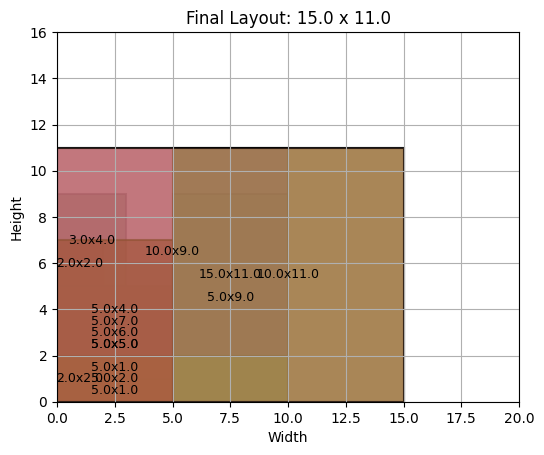

Expression: hf-cd-ea-bg-|-| for area = 165.0


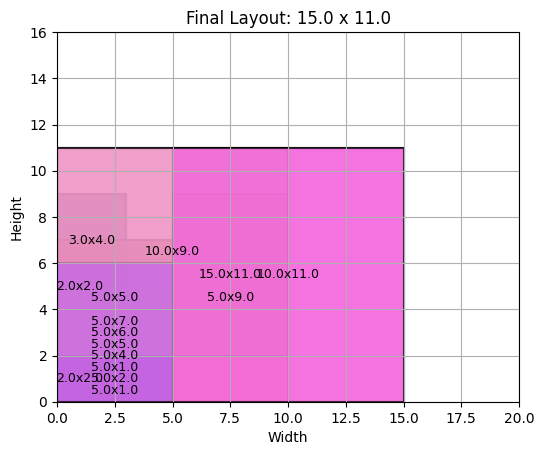

Expression: hb-cd-ea-fg-|-| for area = 117.0


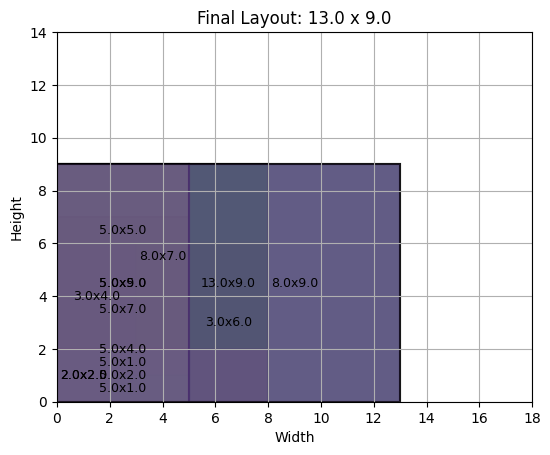

Expression: hb-cd--aefg-|-| for area = 110.0


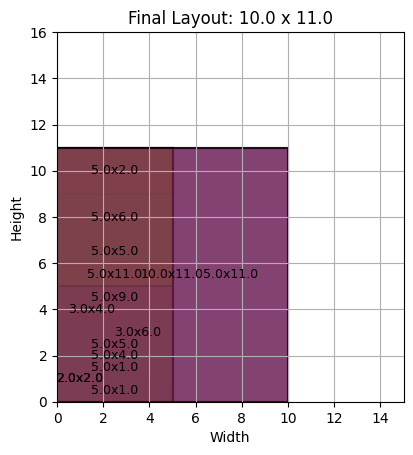

Final step reached!


In [ ]:
def visualize_sequence(output_queue, blocks):
    idx =0;
    for expression, areaa in output_queue:
        print(f"Expression: {expression} for area = {areaa}")


        # Generate expr from the current expression
        expr = generate_expr(expression, blocks)

        # Evaluate the expression to get block positions
        final_block, blocks_positions = evaluate_expression(expr)

        # Visualize the current state
        visualize(blocks_positions)
        idx = idx +1
        # Break after visualizing the final state
        if idx == len(output_queue):
            print("Final step reached!")
            break



visualize_sequence(output_queue, blocks)
